# Calorie Prediction: Data Analysis and Modeling
This notebook covers the steps of data analysis, feature engineering, and machine learning modeling for the calorie estimation competition.  
Purpose: To estimate calories burned during an exercise.

In [4]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graphics settings
sns.set(style="whitegrid")
plt.style.use("ggplot")

## 1. Loading Data and Initial Review (Data Exploration)

In [5]:
# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Examine the first 5 lines
print("🔹 Train Set")
display(train_df.head())

print("\n🔹 Test Set")
display(test_df.head())

print("\n🔹 Sample Submission")
display(sample_submission.head())

# General information and data type control
print("\n📋 Train Info:")
train_df.info()

# Missing value check
print("\n🧼 Eksik Değerler (Train):")
print(train_df.isnull().sum())

print("\n🧼 Eksik Değerler (Test):")
print(test_df.isnull().sum())

🔹 Train Set


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0



🔹 Test Set


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5



🔹 Sample Submission


,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283



📋 Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB

🧼 Eksik Değerler (Train):
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

🧼 Eksik Değerler (Test):
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

## 2. Data Cleaning

In [ ]:
# Convert sex column to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Distinction between ID and target variables
X = train_df.drop(['id', 'Calories'], axis=1)
y = train_df['Calories']
test_features = test_df.drop(['id'], axis=1)

# Min-max control
print("📉 Değer Aralıkları:")
display(train_df.describe().T[['min', 'max']])


📉 Değer Aralıkları:


,min,max
id,0.0,749999.0
Sex,NaN,NaN
Age,20.0,79.0
Height,126.0,222.0
Weight,36.0,132.0
Duration,1.0,30.0
Heart_Rate,67.0,128.0
Body_Temp,37.1,41.5
Calories,1.0,314.0


## 3. Exploratory Data Analysis - EDA

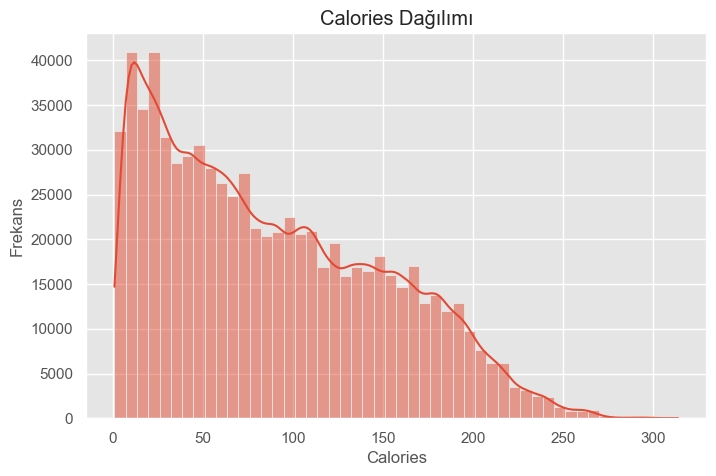

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Calories'], bins=50, kde=True)
plt.title("Calories Dağılımı")
plt.xlabel("Calories")
plt.ylabel("Frekans")
plt.show()

## 4. Basit Modelleme (LightGBM ile)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb

# Özellik ve hedef değişkenleri ayır
X = train.drop(['Calories', 'id'], axis=1)
y = train['Calories']

# Eğitim ve doğrulama seti
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Doğrulama tahmini
val_pred = model.predict(X_val)

# RMSLE hesapla
rmsle = np.sqrt(mean_squared_log_error(y_val, val_pred))
print(f'Validation RMSLE: {rmsle:.5f}')

## 5. Test Seti için Tahmin ve Submission Dosyası Oluşturma

In [ ]:
# Test seti için tahmin
X_test = test.drop(['id'], axis=1)
test_pred = model.predict(X_test)

# Submission dosyası
submission = pd.DataFrame({'id': test['id'], 'Calories': test_pred})
submission.to_csv('submission.csv', index=False)
submission.head()

Yarışma için submission.csv dosyası oluşturulmuştur. Modeli geliştirmek için özellik mühendisliği, hiperparametre optimizasyonu ve ensemble yöntemleri ekleyebilirsin.